In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns

In [2]:
I_D = pd.read_csv('DEF_IMMO.csv', sep=',', na_values='None')


In [4]:
I_D.columns

Index(['Unnamed: 0', 'type_of_property', 'subtype_of_property', 'locality',
       'province', 'région', 'price', 'number_of_facades', 'house_area',
       'house_area_cat', 'number_of_rooms', 'number_of_rooms_cat',
       'surface_of_the_land', 'surface_of_the_land_cat',
       'fully_equipped_kitchen', 'garden', 'garden_area', 'terrace',
       'terrace_area', 'open_fire', 'swimming_pool', 'state_of_the_building',
       'construction_year', 'construction_year_cat'],
      dtype='object')

In [3]:
I_D.head(3)

,Unnamed: 0,type_of_property,subtype_of_property,locality,province,région,price,number_of_facades,house_area,house_area_cat,...,fully_equipped_kitchen,garden,garden_area,terrace,terrace_area,open_fire,swimming_pool,state_of_the_building,construction_year,construction_year_cat
0,0,house,house,1050,Bruxelles-Capitale,Région Bruxelles-capitale,340000,2.0,203.0,]180-240 m²],...,1,0,NaN,1,NaN,0,0,to be done up,1901.0,1900-1919
1,1,house,villa,1880,Brabant flamand,Région flamande,525000,4.0,250.0,]240m²- ],...,1,1,430.0,1,40.0,0,0,as new,1992.0,1980-1999
2,2,house,exceptional property,4900,Liège,Région wallonne,550000,4.0,475.0,]240m²- ],...,1,1,1400.0,1,NaN,0,0,good,1853.0,older than 1900


In [5]:
I_D[['price', 'number_of_facades', 'house_area', 'number_of_rooms', 'surface_of_the_land', 'fully_equipped_kitchen', 'garden', 'garden_area', 'terrace', 'terrace_area', 'open_fire', 'swimming_pool']].corr()

,price,number_of_facades,house_area,number_of_rooms,surface_of_the_land,fully_equipped_kitchen,garden,garden_area,terrace,terrace_area,open_fire,swimming_pool
price,1.000000,0.236834,0.562302,0.259208,0.338731,0.023179,0.114484,0.235094,0.124479,0.332998,0.173588,0.161066
number_of_facades,0.236834,1.000000,0.310599,0.142015,0.428609,0.015581,0.153660,0.393472,0.056564,0.271851,0.168520,0.123124
house_area,0.562302,0.310599,1.000000,0.413901,0.312170,-0.001036,0.199747,0.281744,-0.005159,0.419985,0.190375,0.143540
number_of_rooms,0.259208,0.142015,0.413901,1.000000,0.143621,0.006278,0.117492,0.166487,0.001295,0.330022,0.085755,0.043972
surface_of_the_land,0.338731,0.428609,0.312170,0.143621,1.000000,0.013933,0.050238,0.874596,0.054660,0.297285,0.129688,0.154784
fully_equipped_kitchen,0.023179,0.015581,-0.001036,0.006278,0.013933,1.000000,0.080416,0.031604,0.098657,0.041687,0.078573,0.028452
garden,0.114484,0.153660,0.199747,0.117492,0.050238,0.080416,1.000000,NaN,0.068224,0.207975,0.166765,0.052076
garden_area,0.235094,0.393472,0.281744,0.166487,0.874596,0.031604,NaN,1.000000,0.040782,0.237416,0.112698,0.136259
terrace,0.124479,0.056564,-0.005159,0.001295,0.054660,0.098657,0.068224,0.040782,1.000000,NaN,0.039186,0.048975
terrace_area,0.332998,0.271851,0.419985,0.330022,0.297285,0.041687,0.207975,0.237416,NaN,1.000000,0.151661,0.130620


In [6]:
var_corr= I_D[['price', 'number_of_facades', 'house_area', 'number_of_rooms', 'surface_of_the_land', 'fully_equipped_kitchen', 'garden', 'garden_area', 'terrace', 'terrace_area', 'open_fire', 'swimming_pool']].corr()

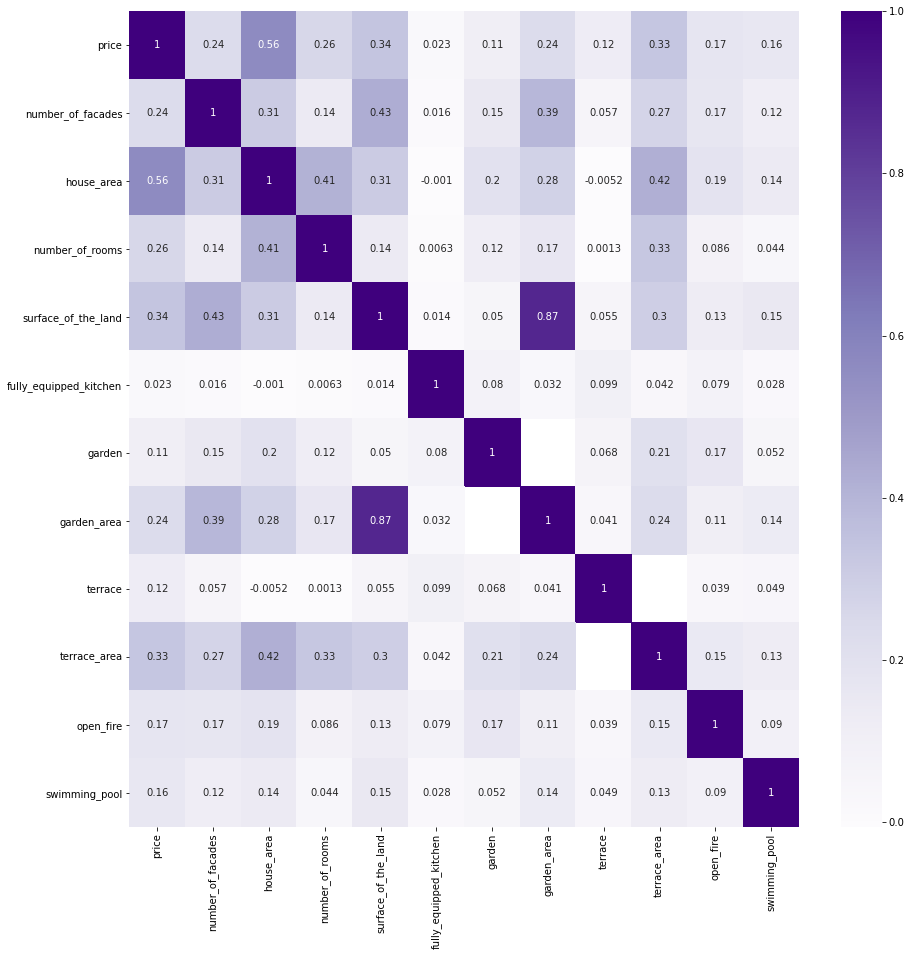

In [13]:
fig, ax = plt.subplots(figsize=(15,15)) 

sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True, cmap="Purples")
